Математическая модель, играющая роль базовой в популяционной экологии, возникла в работе Я.Б. Зельдовича и Д.А. Франк-Каменецкого (модель ЗФК) для описания процесса горения бикфордова шнура. Уравнение модели в размерном виде можно записать как:
$$\frac{\partial n}{\partial t} = D \frac{\partial^2 n}{\partial x^2} + an(n-b)(K-n) $$
Будем считать, что 0 ≤ b < K. В первоначальном варианте
переменная n имела смысл температуры горящей среды, b —
некоторое пороговое значение — температура воспламенения.
Уравнению можно придать и очевидный
экологический смысл — оно описывает во времени и пространстве
динамику популяции типа Олли.

Один из возможных вариантов безразмерной записи уравнения ЗФК имеет вид:
$$ \frac{\partial n}{\partial t} = \frac{\partial^2 n}{\partial x^2} + \alpha n(n-\epsilon )(1-n) $$
$$ \b{ Оценки для характерных длин и скоростей на основе теории
размерности мы предоставляем получить читателю в качестве
упражнения.} $$
Для исследования методами фазовой плоскости используем
безразмерную форму записи . Вводя переменную бегущей
волны по формуле ξ = Vt − x, здесь V — неизвестный параметр,
подлежащий определению при решении задачи, получим
нелинейное дифференциальное уравнение второго порядка:
$$V n'_{\xi} = n"_{\xi \xi} + \alpha n (n - \epsilon)(1-n)$$

Пространственно однородные стациоанрные решения есть суть n=0 , n = b, n= K.Рассмотрим для уравнения задачу Коши со следующимим начальными условиями: n(x,0)= K , n(x,0)= 0, n(x,0)= b x<0.

В силу диффузии начальный профиль в виде
“ступеньки” размажется, там, где появились малые возмущения,
плотность популяции начнет возрастать. В системе возникнет т. н.
“волна переключения” (или “волна переброса”). Если предположить, что волна переключения распространяется, не
меняя своей формы, с постоянной скоростью. В этом случае можно
ввести переменную “бегущей волны” по формуле ξ = Vt − x, здесь
V — неизвестный параметр, подлежащий определению при
решении задачи. Переходя к дифференцированию по переменной
бегущей волны, получим нелинейное дифференциальное уравнение
второго порядка:

Фазовым пространством этого уравнения будет полуплоскость
( n ≥ 0 , n′ ). Вводя новую переменную  $ z = n′_{\xi} $, последнее уравнение можно записать в виде
n′ = z,

In [1]:
a=1

T0, T=0, 15
L0, L=-40, 40 #отрезок координаты
INF=10000

In [2]:
#Подключение библиотек
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import gridspec
import scipy
from scipy import integrate
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')
from matplotlib import axes
from scipy import misc

In [22]:
#функция системы
def f(ksi, w, a, v,eta): #w=(u, p)
    u, p = w[0], w[1]
    return np.array([-p, -v*p-a*u*(1-u)*(u-eta)])

In [23]:
def rk4(f, tmin, tmax, tau, u0, args, flag = False): #t - отрезок, tau - шаг, с которым ищем решение, u0 =[y0,v0] - нач
    c2, a21, c3, a31, a32, c4, a41, a42, a43, b1, b2, b3, b4 = 1/2, 1/2, 1/2, 0, 1/2, 1, 0, 0, 1, 1/6, 2/6, 2/6, 1/6
    t = np.arange(tmin, tmax, tau)
    n = len(t)
    u = np.zeros((n, len(u0)))
    u[0] = u0
    for i in range(0, n - 1):
        k1 = f(t[i], u[i], *args)
        k2 = f(t[i] + c2*tau, u[i] + a21 * tau * k1, *args)
        k3 = f(t[i] + c3*tau, u[i] + a31 * tau * k1 + a32 * tau * k2, *args)
        k4 = f(t[i] + c4*tau, u[i] + a41 * tau * k1 + a42 * tau * k2 + a43 * tau * k3, *args)
        u[i+1] = u[i] + tau*(b1*k1 + b2*k2 + b3 * k3 + b4 * k4)
        if flag and np.abs(u[i+1][0])<np.abs(1-u0[0]):
            y = np.array([u[i_][0] for i_ in range(n)])
            p = [u[i_][1] for i_ in range(n)]
            t = t
            y = y[:np.where(y==0.0)[0][0]]
            p = p[:len(y)]
            t = t[:len(y)]
            return (t, y, p)
    y = [u[i][0] for i in range(n)]
    v = [u[i][1] for i in range(n)]
    return (t, y, v)

In [32]:
a=1
def flux_plot(v, ax, ylim,eta):
    u_=np.arange(-0.5, 1.55, 0.05)
    #рисуем много траекторий
    for u0 in np.arange(-0.5, 1.55, 0.05):
        s1, s2,s3 = "", "",""
        if u0==-0.5:
            s1, s2,s3 ="start=($u_0$, 0.1)", "start=($u_0$, -0.1)","start=($u_0$, 0.1)"
        t, u, p = rk4(f, tmin= -1, tmax=4, tau=0.1, u0=(u0,ylim), args = (a, v, eta))
        ax.plot(u, p, color = "tab:green", label = s1, zorder = 0)
        t, u, p = rk4(f, tmin= -1, tmax=4, tau=0.1, u0=(u0,-ylim), args = (a, v, eta))
        ax.plot(u, p, color = "tab:blue", label = s2, zorder = 0)

    ax.set_ylim(-ylim, ylim)
    ax.set_xlim(-0.5, 1.5)
    ax.scatter(0, 0, color = "black", s=50, zorder=2, label = "(0,0), (1. 0),({},0)".format(eta))
    ax.scatter(1, 0, color = "black", s=50, zorder=2)
    ax.scatter(eta, 0, color = "black", s=50, zorder=2)
    ax.set_xlabel("u")
    ax.set_ylabel("p")
    ax.set_title("a="+str(a)+", v="+str(v)+ ", eta=" +str(eta))
    ax.legend()


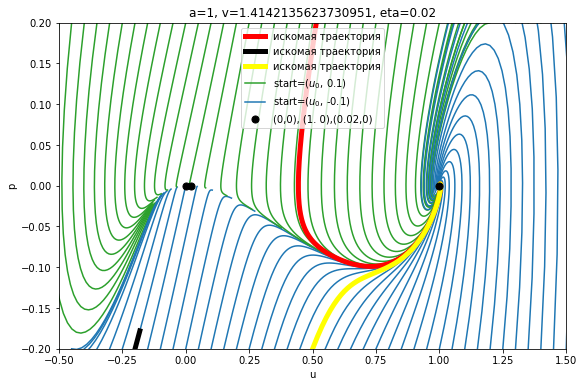

In [94]:
fig= plt.figure(figsize = (20, 6))
ax = fig.add_subplot(121)
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(1,1), args = (1, np.sqrt(2),0.02), flag = True)
ax.plot(u_ksi, p_ksi, color = "red", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(-0.2,-0.2), args = (1, np.sqrt(2),0.02), flag = True)
ax.plot(u_ksi, p_ksi, color = "black", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(0.5,-0.2), args = (1, np.sqrt(2),0.02), flag = True)
ax.plot(u_ksi, p_ksi, color = "yellow", lw = 5, zorder = 1, label = "искомая траектория")
flux_plot(np.sqrt(2), ax, 0.2,0.02)


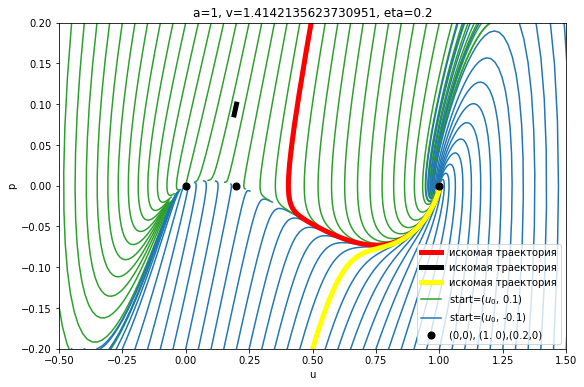

In [105]:
fig= plt.figure(figsize = (20, 6))
ax = fig.add_subplot(121)
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(1,1), args = (1, np.sqrt(2),0.2), flag = True)
ax.plot(u_ksi, p_ksi, color = "red", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(0.2,0.1), args = (1, np.sqrt(2),0.2), flag = True)
ax.plot(u_ksi, p_ksi, color = "black", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(0.5,-0.2), args = (1, np.sqrt(2),0.2), flag = True)
ax.plot(u_ksi, p_ksi, color = "yellow", lw = 5, zorder = 1, label = "искомая траектория")
flux_plot(np.sqrt(2), ax, 0.2,0.2)

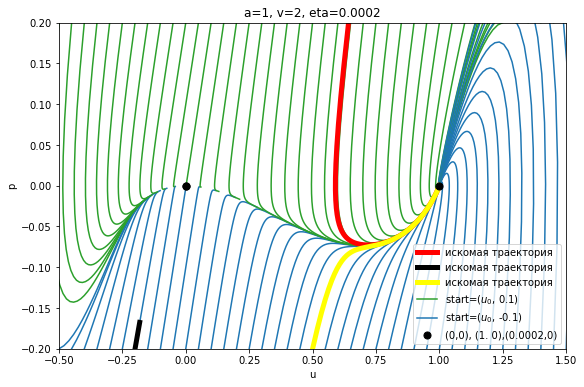

In [104]:
fig= plt.figure(figsize = (20, 6))
ax = fig.add_subplot(121)
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(1,1), args = (1, 2,0.0002), flag = True)
ax.plot(u_ksi, p_ksi, color = "red", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(-0.2,-0.2), args = (1, 2,0.0002), flag = True)
ax.plot(u_ksi, p_ksi, color = "black", lw = 5, zorder = 1, label = "искомая траектория")
ksi, u_ksi, p_ksi = rk4(f, tmin=-INF, tmax=INF, tau=0.1, u0=(0.5,-0.2), args = (1, 2,0.0002), flag = True)
ax.plot(u_ksi, p_ksi, color = "yellow", lw = 5, zorder = 1, label = "искомая траектория")
flux_plot(2, ax, 0.2,0.0002)

## Численное решение: явная схема

In [109]:
def explicit(T0, T, tau, L0, L, h,eta):
    s = "curanta="+str(tau/h**2)
    N, M=int((T-T0)/tau), int((L-L0)/h)
    t = np.arange(T0, T+tau, tau)
    x = np.arange(L0, L+h, h)
    u = np.zeros((N+1)*(M+1)).reshape(N+1, M+1)
    for n in range(N+1):
        u[n][0]=1
        u[n][M-1]=0
    for m in range(M+1):
        xx=L0+m*h
        if xx>=0:
            u[0][m]=0
        else:
            u[0][m]=1
    for n in range(0, N):
        for m in range(1, M):
            u[n+1][m]=u[n][m]+(tau/h**2)*(u[n][m+1]-2*u[n][m]+u[n][m-1])+a*tau*u[n][m]*(1-u[n][m])*(u[n][m]-eta)
    return (t, x, u, s)

In [107]:
##Построение 3d графика решения и проекций решения на x и t
def plot(x, t, u, s):
    x_, t_ = np.meshgrid(x, t)
    print(len(x_), len(x_[0]), len(u), len(u[0]))
    fig = plt.figure(figsize = (20, 6))
    #spec = gridspec.GridSpec(ncols=3, nrows=1,
    # width_ratios=[10, 5, 5])
    gs2 = gridspec.GridSpec(3, 3)
    ax = fig.add_subplot(gs2[:, :1], projection='3d')
    ax.plot_wireframe(x_, t_, u)
    #print(len(u_th(x_-2*t_)))
    #ax.plot_surface(x_, t_, u_th(x, t), color = "green", alpha = 0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("u")
    ax.set_title(s)
    ax.set_zlim(0, 1.1)
    ax1 = fig.add_subplot(gs2[:2, -2])
    cnt=0
    for n in range(len(t)):
        if cnt % int(len(t)/10)==0:
            ax1.plot(x, u[n], label = "t="+str(round(t[n])))
            ax1.set_xlabel("x")
            ax1.set_ylabel("u")
            ax1.legend()
        cnt +=1
    ax2= fig.add_subplot(gs2[:2, -1])
    for m in range(len(x)):
        if m % 1 == 0:
            ax2.plot(t, u[:, m], label = "x="+str(x[m]))
            ax2.set_xlabel("t")
            ax2.set_ylabel("u")
            ax2.legend(bbox_to_anchor=(1, 1), ncol=3)
    plt.show()
    return

31 81 31 81


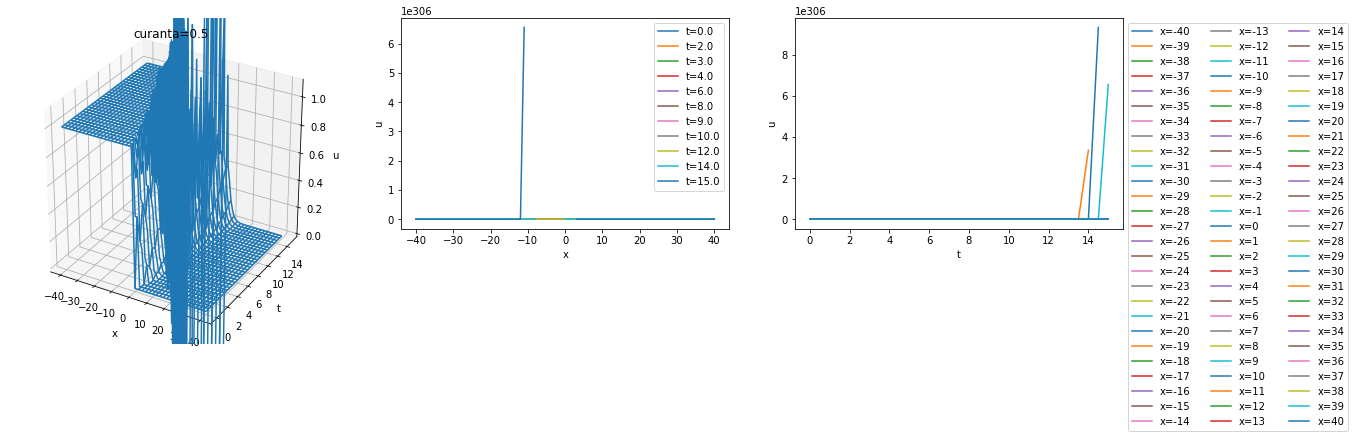

151 81 151 81


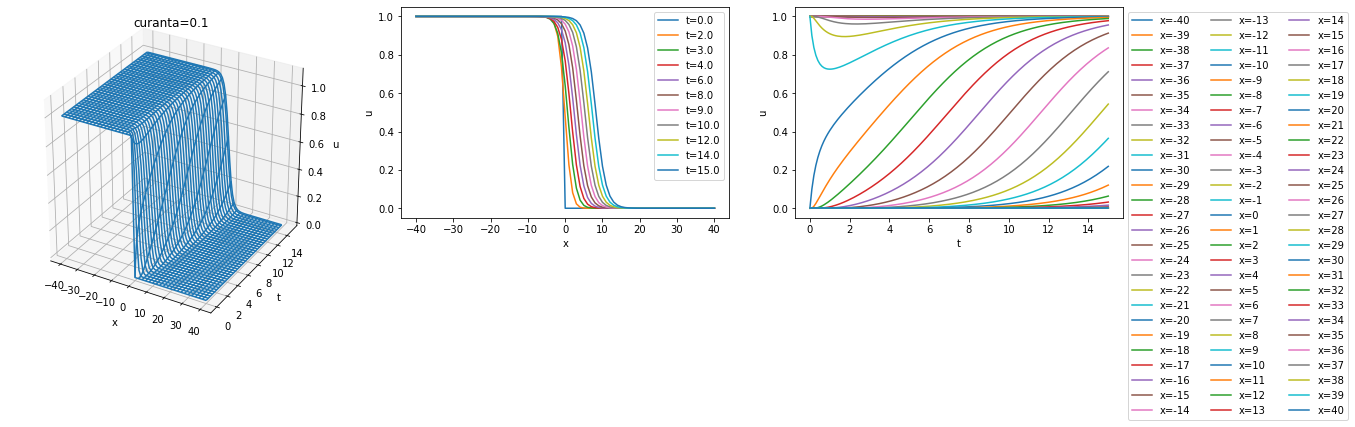

1501 81 1501 81


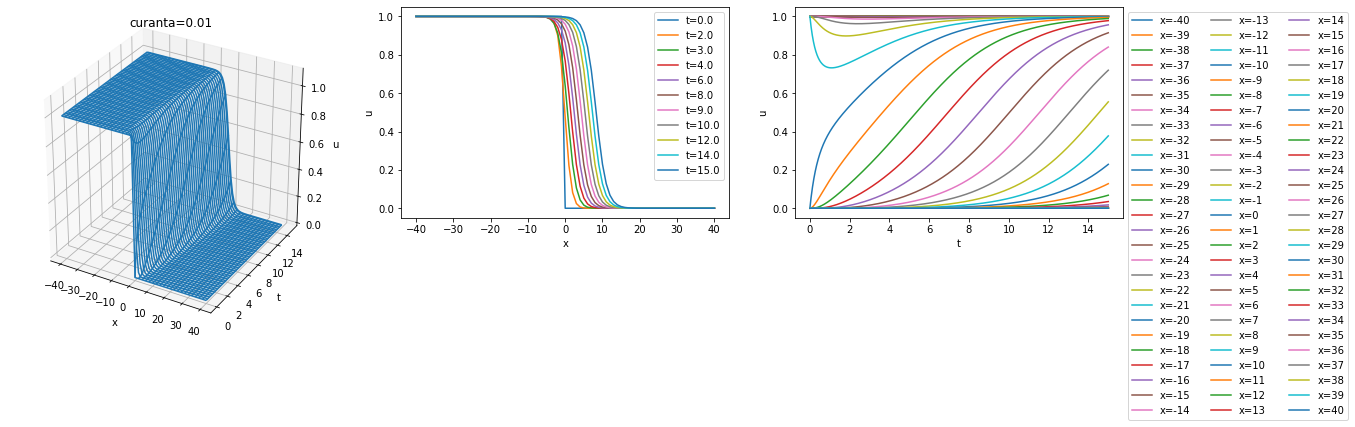

In [110]:
t, x, u, s = explicit(T0=T0, T=T, tau=0.5, L0=L0, L=L, h=1,eta=0.02)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.1, L0=L0, L=L, h=1,eta=0.02)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.01, L0=L0, L=L, h=1,eta=0.02)
plot(x, t, u, s)

31 81 31 81


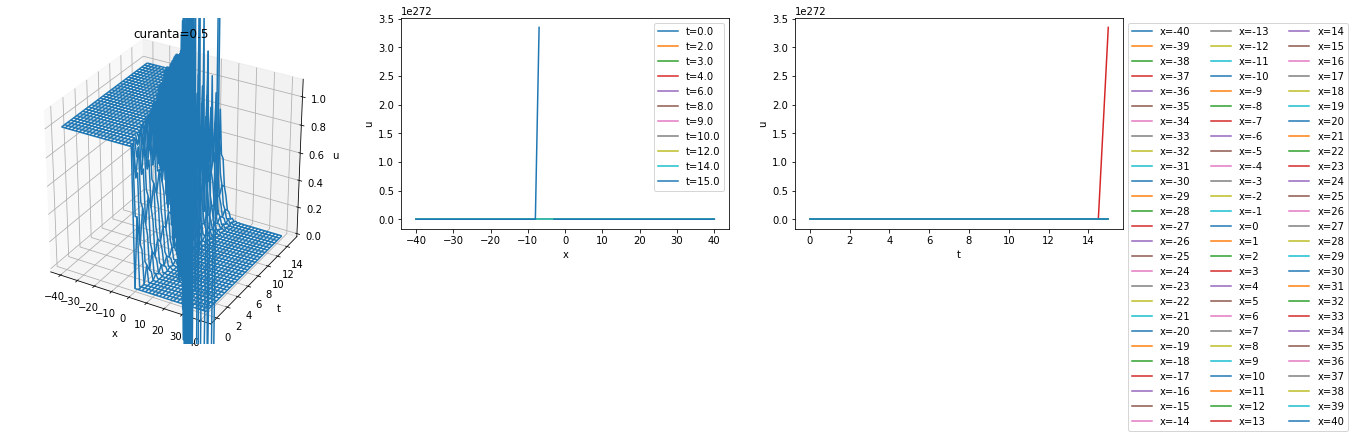

151 81 151 81


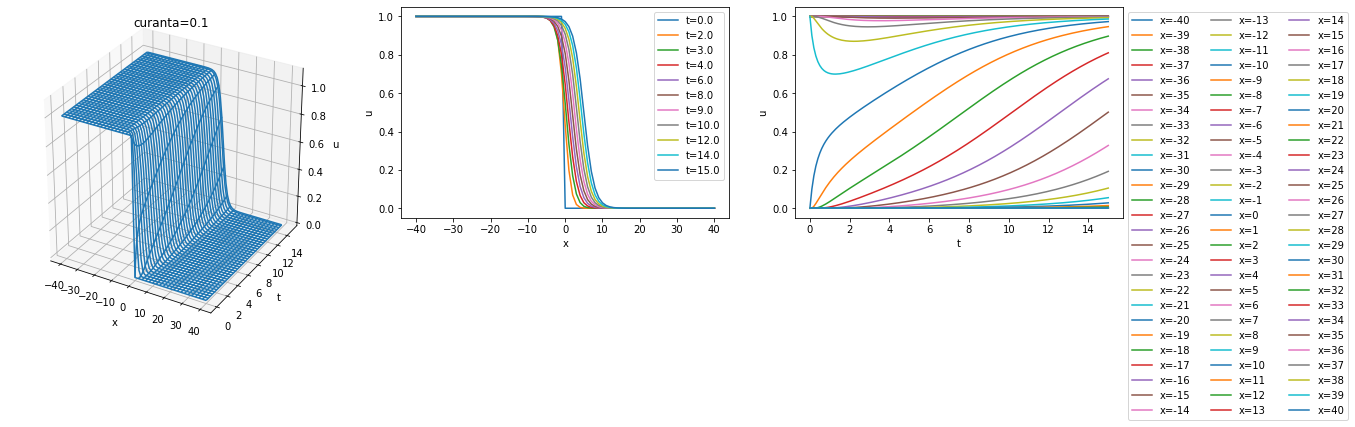

1501 81 1501 81


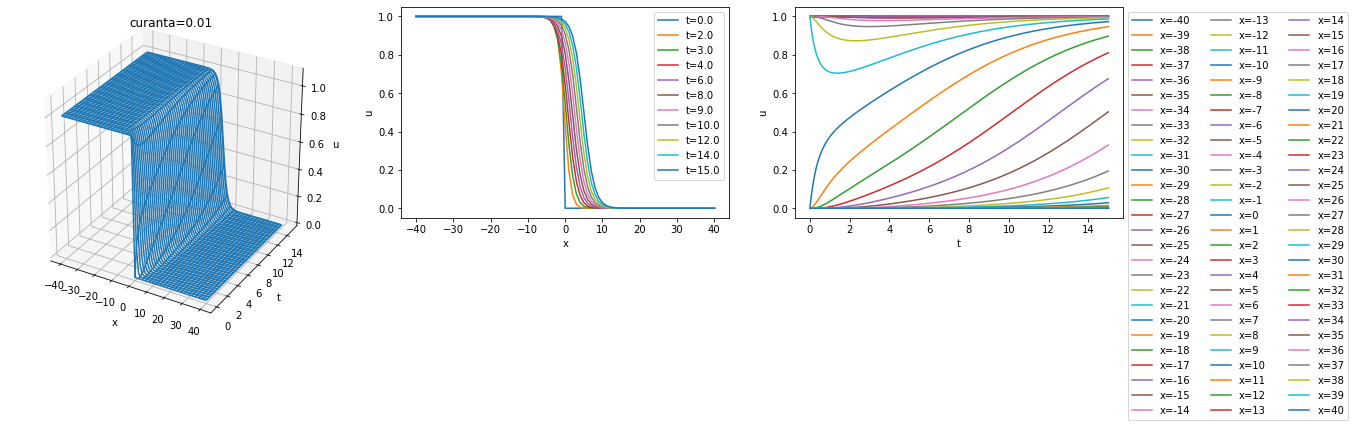

In [111]:
t, x, u, s = explicit(T0=T0, T=T, tau=0.5, L0=L0, L=L, h=1,eta=0.2)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.1, L0=L0, L=L, h=1,eta=0.2)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.01, L0=L0, L=L, h=1,eta=0.2)
plot(x, t, u, s)

31 81 31 81


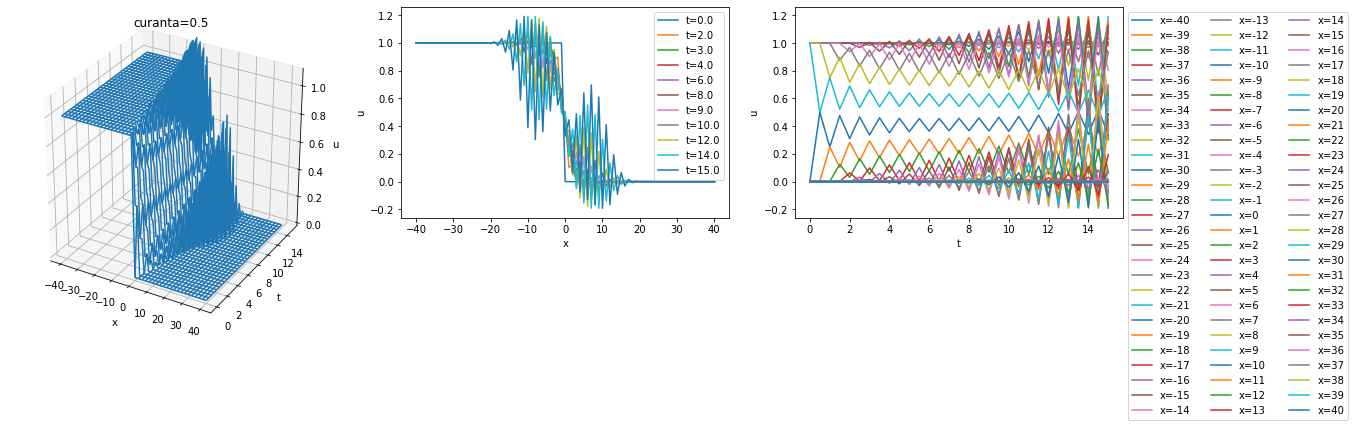

151 81 151 81


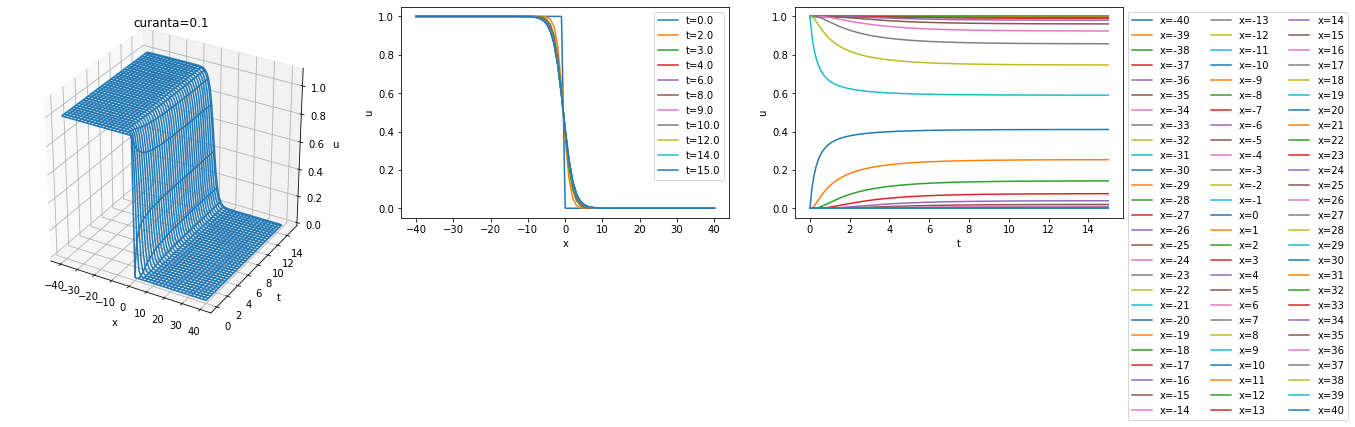

1501 81 1501 81


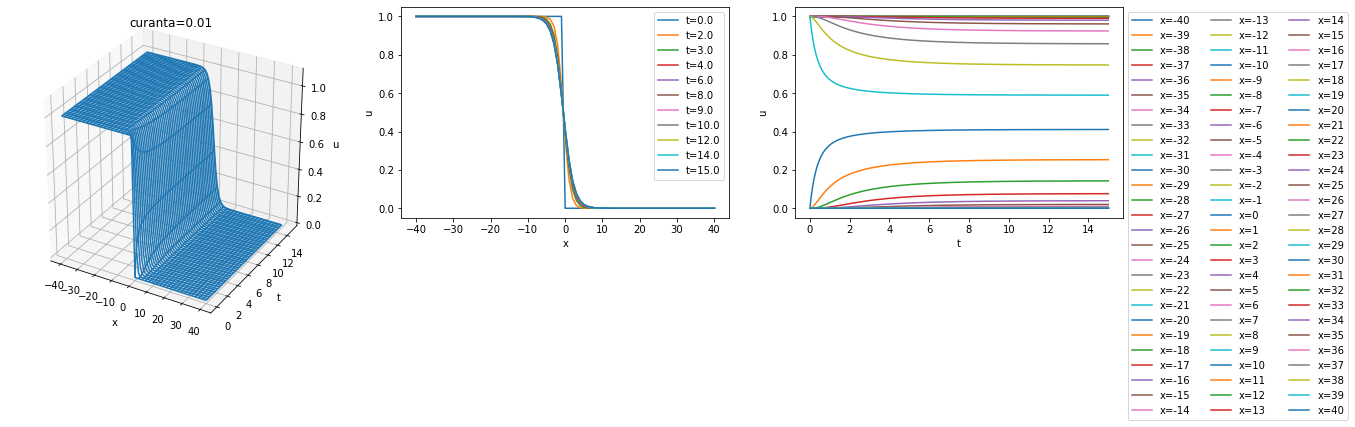

In [112]:
t, x, u, s = explicit(T0=T0, T=T, tau=0.5, L0=L0, L=L, h=1,eta=0.5)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.1, L0=L0, L=L, h=1,eta=0.5)
plot(x, t, u, s)
t, x, u, s = explicit(T0=T0, T=T, tau=0.01, L0=L0, L=L, h=1,eta=0.5)
plot(x, t, u, s)

1)Как видно, в силу диффузии профиль ступеньки размывается, в системе возникает "волна переключения"

2)При достоточно больших eta размытия ступеньки не возникает

3)При числе Куранта большим 0.5 устойчивость пропадает



## Метод расщепления по физическим процессам